In [1]:
#Importing Functions, Libraries and Viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.preprocessing
# Exploring
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# from linear_model: LinearRegression (OLS), LassoLars, TweedieRegressor (Generalized Linear Model)
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures



# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import env
import os
import wrangle

## Data Acquisition

In [2]:
#acquire data
df = wrangle.get_zillow()


In [3]:
train, validate, test = wrangle.wrangle_zillow()

In [4]:
train.head(1)

,id,parcelid,bathrooms,bedrooms,buildingqualitytypeid,calculatedbathnbr,sqft,finishedsquarefeet12,county,fireplacecnt,...,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,los_angeles,orange,ventura
15552,2085054,14230584,2.00,4.00,0.00,2.00,"1,509.00","1,509.00",orange,0.00,...,"474,325.00","2,016.00","385,715.00","5,247.82","60,590,758,123,004.00",0.01,2017-04-04,0,1,0


In [5]:
validate.head(1)

,id,parcelid,bathrooms,bedrooms,buildingqualitytypeid,calculatedbathnbr,sqft,finishedsquarefeet12,county,fireplacecnt,...,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,los_angeles,orange,ventura
16255,2459162,17105812,5.00,4.00,0.00,5.00,"3,798.00","3,798.00",ventura,2.00,...,"735,930.00","2,016.00","279,394.00","8,346.20","61,110,052,051,023.00",-0.05,2017-04-07,0,0,1


In [6]:
#numerical_columns = ['sqft', 'latitude', 'longitude', 'lotsize', 'yearbuilt','structuretaxvaluedollarcnt', 'tax_value', 'assessmentyear','landtaxvaluedollarcnt', 'taxamount', 'censustractandblock','logerror','bathrooms','bedrooms']


In [7]:
numerical_columns = ['sqft','yearbuilt','tax_value','bathrooms','bedrooms']


In [8]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test, numerical_columns)

In [9]:
train_scaled, validate_scaled, test_scaled
train_scaled.shape


(24793, 5)

In [10]:
validate_scaled.head(1)

,sqft_scaled,yearbuilt_scaled,tax_value_scaled,bathrooms_scaled,bedrooms_scaled
16255,0.66,0.99,0.39,0.89,0.60


In [11]:
#check train
train_scaled.head(1)

,sqft_scaled,yearbuilt_scaled,tax_value_scaled,bathrooms_scaled,bedrooms_scaled
15552,0.22,0.97,0.25,0.22,0.60


In [12]:
#split scaled features into train, validate & test

X_train_scaled = train_scaled
y_train = train[['logerror']]

X_validate_scaled = validate_scaled
y_validate = validate[['logerror']]

X_test_scaled = test_scaled
y_test = test[['logerror']]


In [13]:
validate_scaled

,sqft_scaled,yearbuilt_scaled,tax_value_scaled,bathrooms_scaled,bedrooms_scaled
16255,0.66,0.99,0.39,0.89,0.60
22709,0.14,0.96,0.21,0.00,0.20
19637,0.35,0.95,0.27,0.44,0.80
6261,0.18,0.97,0.22,0.11,0.40
24138,0.18,0.98,0.17,0.33,0.20
...,...,...,...,...,...
13349,0.75,0.99,0.74,0.67,0.60
37067,0.12,0.96,0.27,0.00,0.20
40628,0.42,0.97,0.83,0.67,0.40
42034,0.11,0.97,0.19,0.00,0.20


In [14]:
X_train_scaled.head(1)

,sqft_scaled,yearbuilt_scaled,tax_value_scaled,bathrooms_scaled,bedrooms_scaled
15552,0.22,0.97,0.25,0.22,0.60


In [15]:
y_train.head(1)

,logerror
15552,0.01


In [16]:
#takeaways

## Exploration

## 1. What is the realtionship between bedrooms, bathrooms and logerror?

## 2. How does tax_value relate to log error?

<Figure size 864x576 with 0 Axes>

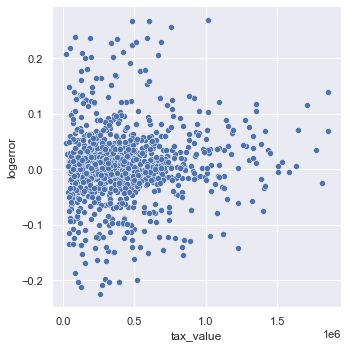

In [17]:
plt.figure(figsize=(12,8))
sns.relplot(x=train['tax_value'].sample(1000),y='logerror', data=train, kind='scatter')

<Figure size 1008x576 with 0 Axes>

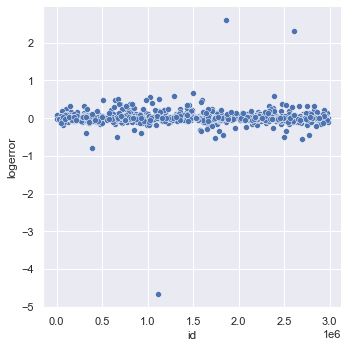

<Figure size 1008x576 with 0 Axes>

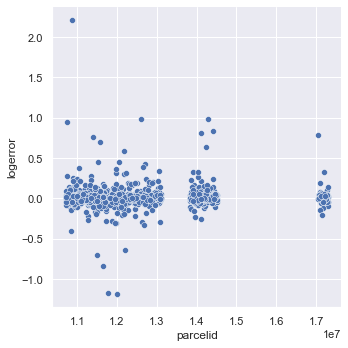

<Figure size 1008x576 with 0 Axes>

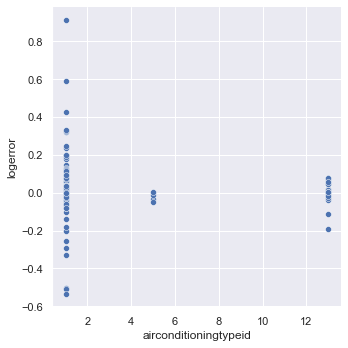

<Figure size 1008x576 with 0 Axes>

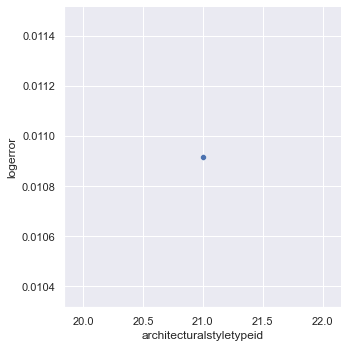

<Figure size 1008x576 with 0 Axes>

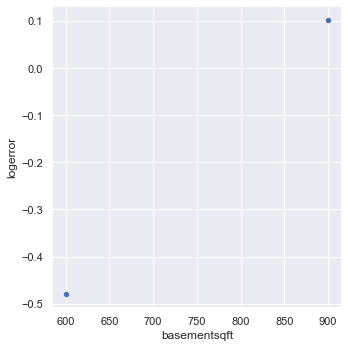

<Figure size 1008x576 with 0 Axes>

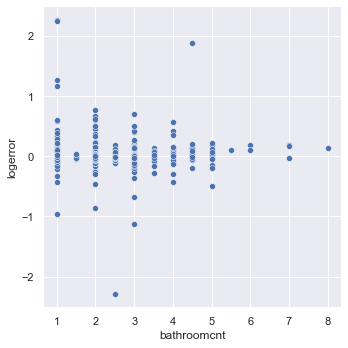

<Figure size 1008x576 with 0 Axes>

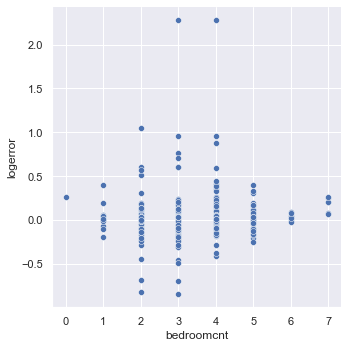

<Figure size 1008x576 with 0 Axes>

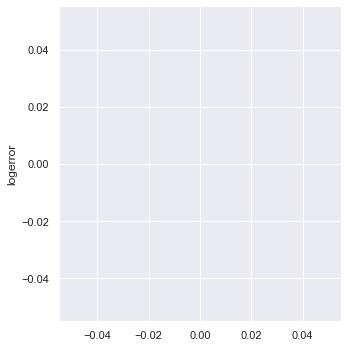

<Figure size 1008x576 with 0 Axes>

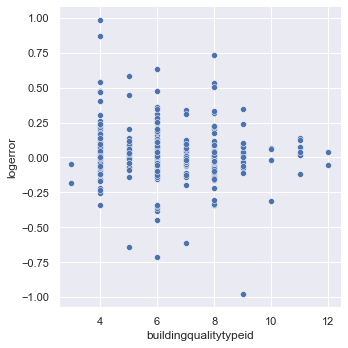

<Figure size 1008x576 with 0 Axes>

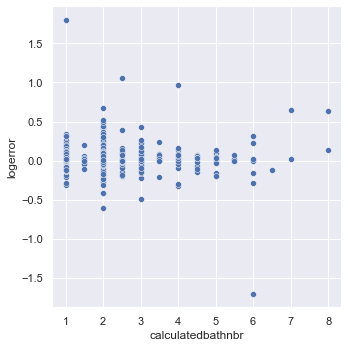

<Figure size 1008x576 with 0 Axes>

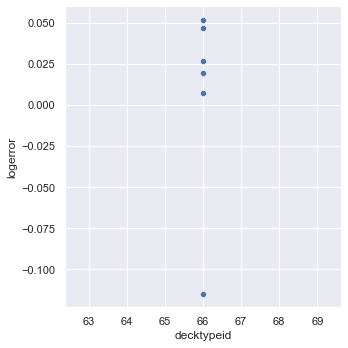

<Figure size 1008x576 with 0 Axes>

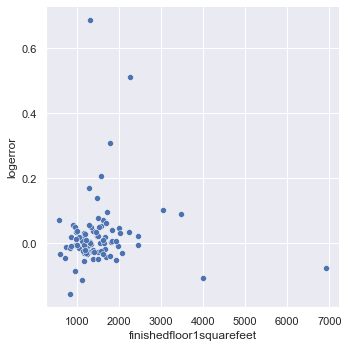

<Figure size 1008x576 with 0 Axes>

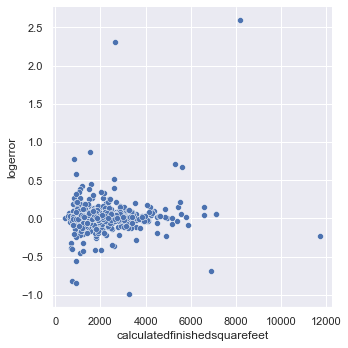

<Figure size 1008x576 with 0 Axes>

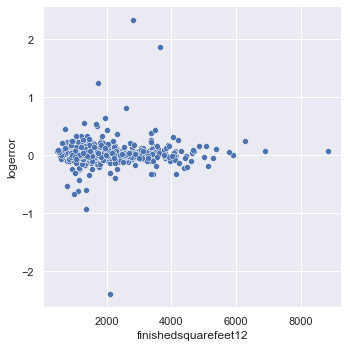

<Figure size 1008x576 with 0 Axes>

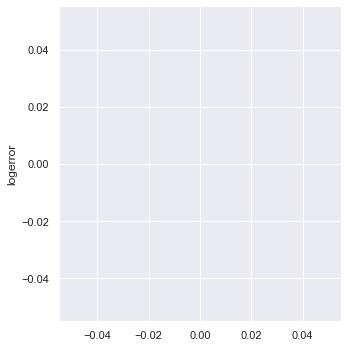

<Figure size 1008x576 with 0 Axes>

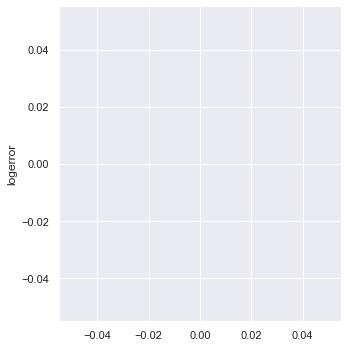

<Figure size 1008x576 with 0 Axes>

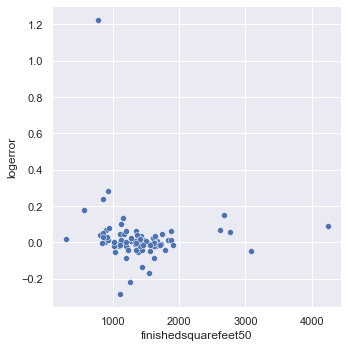

<Figure size 1008x576 with 0 Axes>

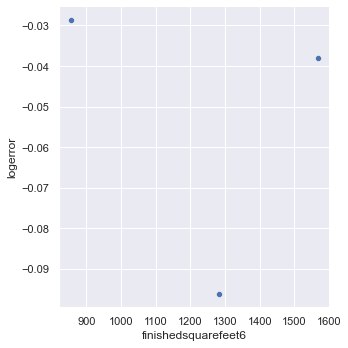

<Figure size 1008x576 with 0 Axes>

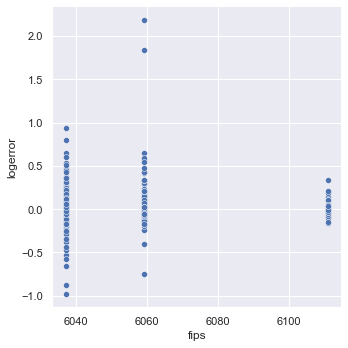

<Figure size 1008x576 with 0 Axes>

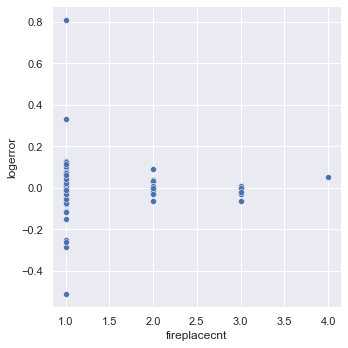

<Figure size 1008x576 with 0 Axes>

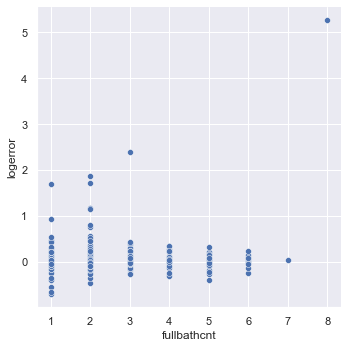

<Figure size 1008x576 with 0 Axes>

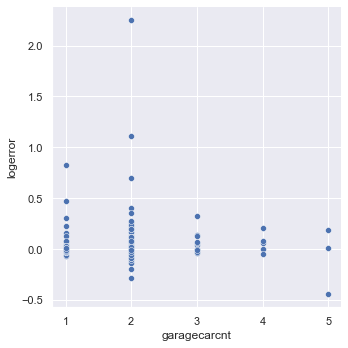

<Figure size 1008x576 with 0 Axes>

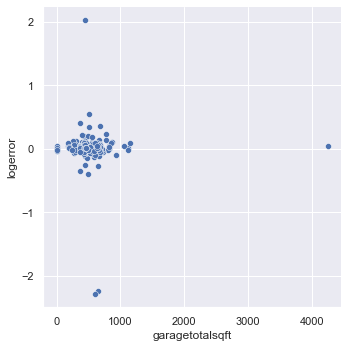

<Figure size 1008x576 with 0 Axes>

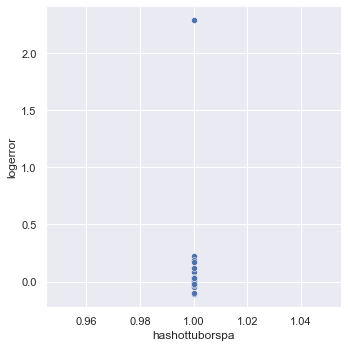

<Figure size 1008x576 with 0 Axes>

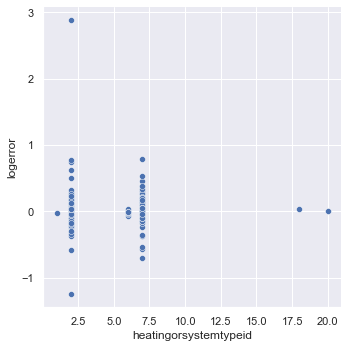

<Figure size 1008x576 with 0 Axes>

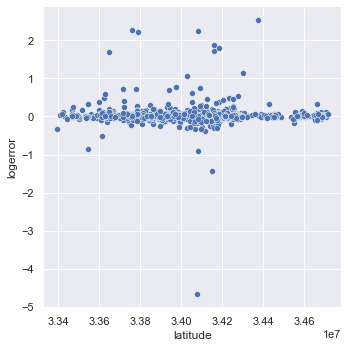

<Figure size 1008x576 with 0 Axes>

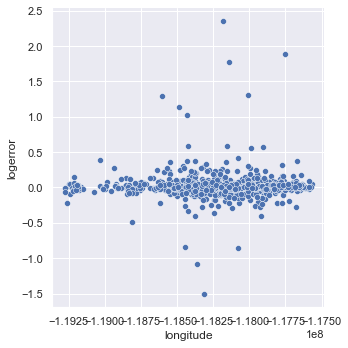

<Figure size 1008x576 with 0 Axes>

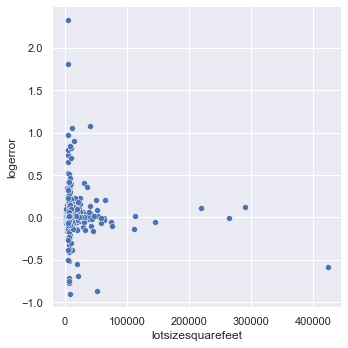

<Figure size 1008x576 with 0 Axes>

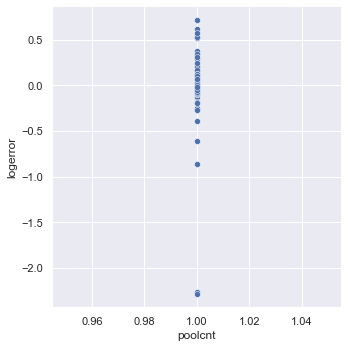

<Figure size 1008x576 with 0 Axes>

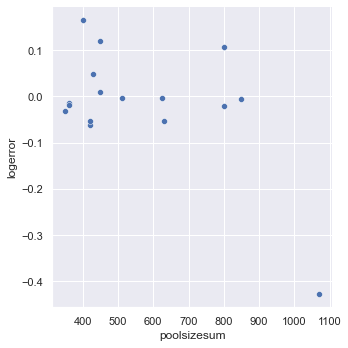

<Figure size 1008x576 with 0 Axes>

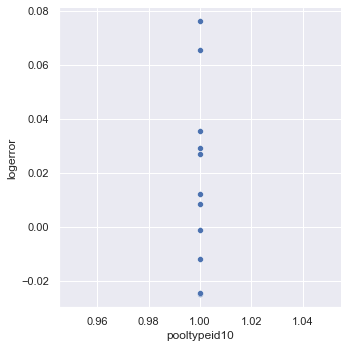

<Figure size 1008x576 with 0 Axes>

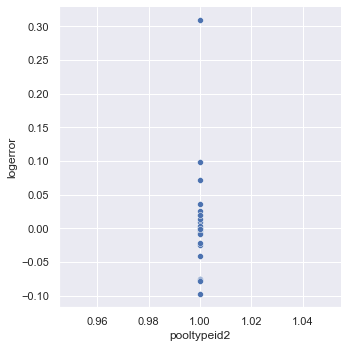

<Figure size 1008x576 with 0 Axes>

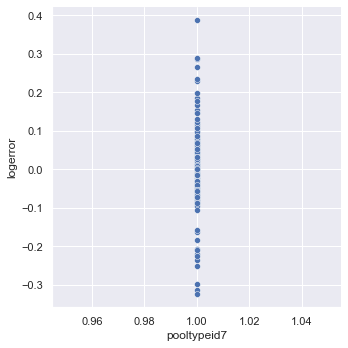

<Figure size 1008x576 with 0 Axes>

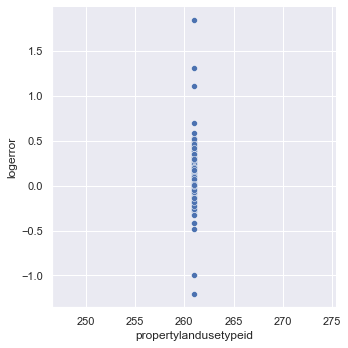

<Figure size 1008x576 with 0 Axes>

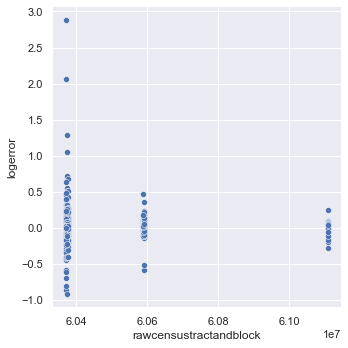

<Figure size 1008x576 with 0 Axes>

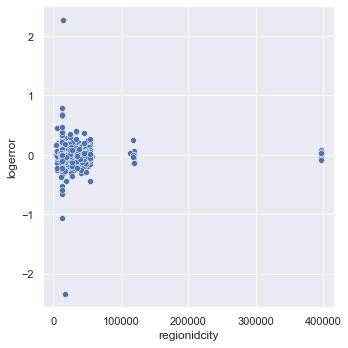

<Figure size 1008x576 with 0 Axes>

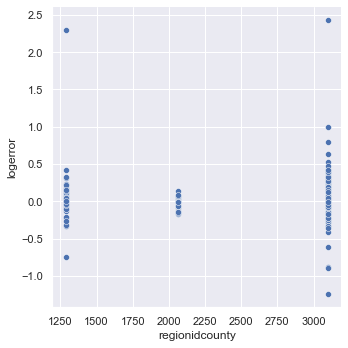

<Figure size 1008x576 with 0 Axes>

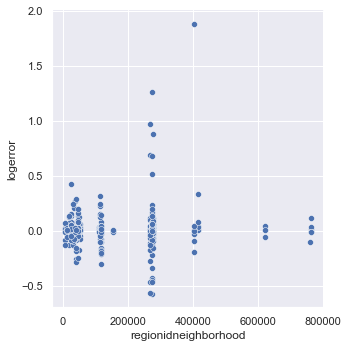

<Figure size 1008x576 with 0 Axes>

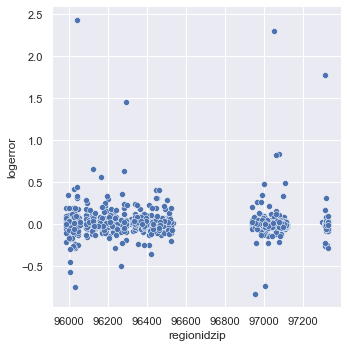

<Figure size 1008x576 with 0 Axes>

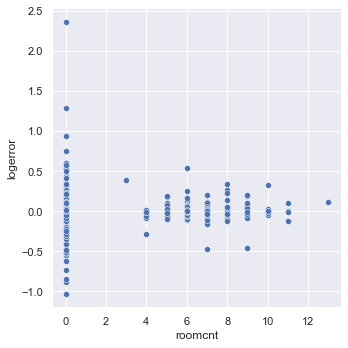

<Figure size 1008x576 with 0 Axes>

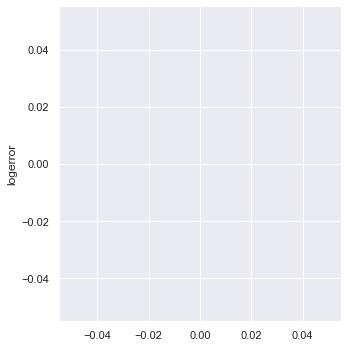

<Figure size 1008x576 with 0 Axes>

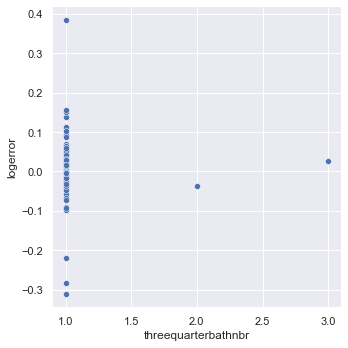

<Figure size 1008x576 with 0 Axes>

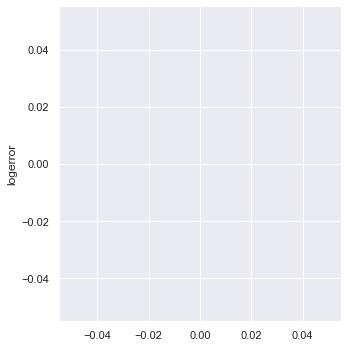

<Figure size 1008x576 with 0 Axes>

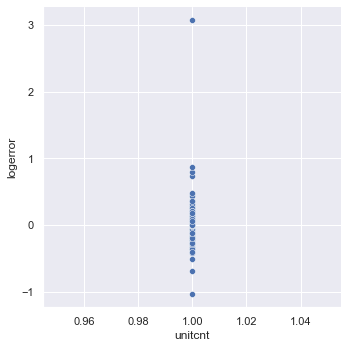

<Figure size 1008x576 with 0 Axes>

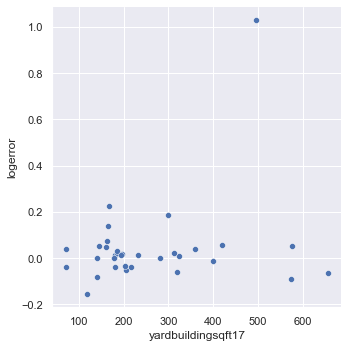

<Figure size 1008x576 with 0 Axes>

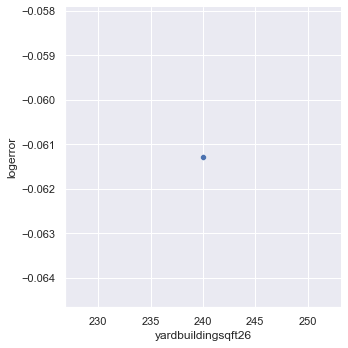

<Figure size 1008x576 with 0 Axes>

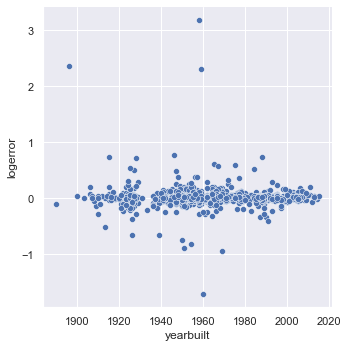

<Figure size 1008x576 with 0 Axes>

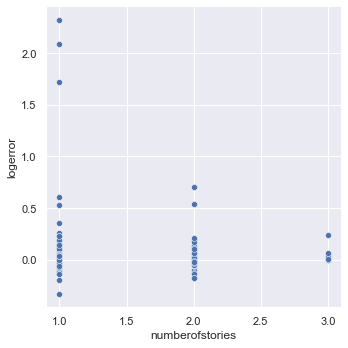

<Figure size 1008x576 with 0 Axes>

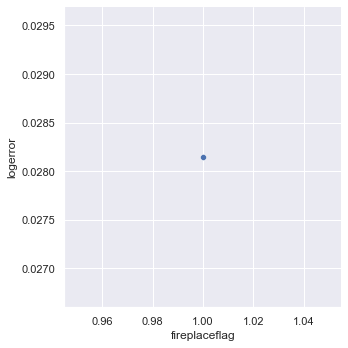

<Figure size 1008x576 with 0 Axes>

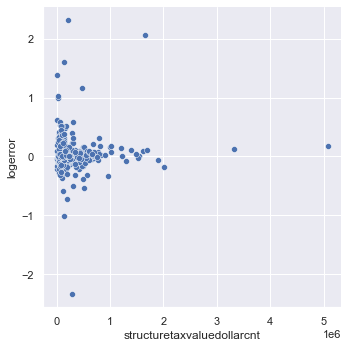

<Figure size 1008x576 with 0 Axes>

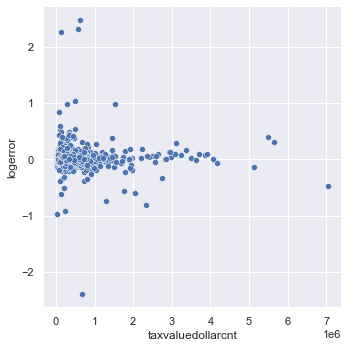

<Figure size 1008x576 with 0 Axes>

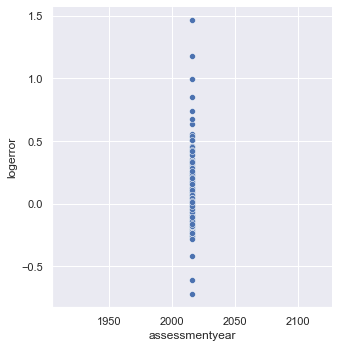

<Figure size 1008x576 with 0 Axes>

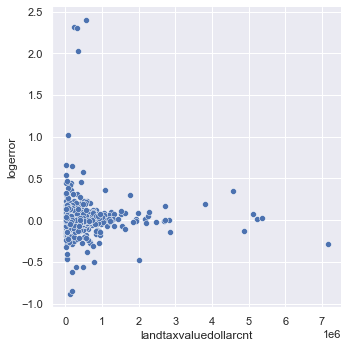

<Figure size 1008x576 with 0 Axes>

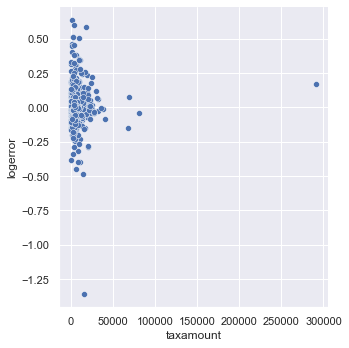

<Figure size 1008x576 with 0 Axes>

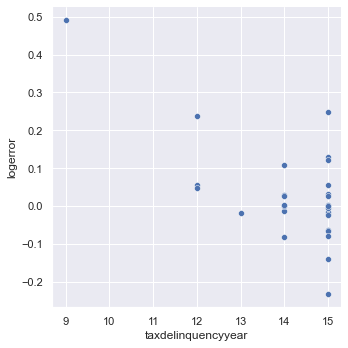

<Figure size 1008x576 with 0 Axes>

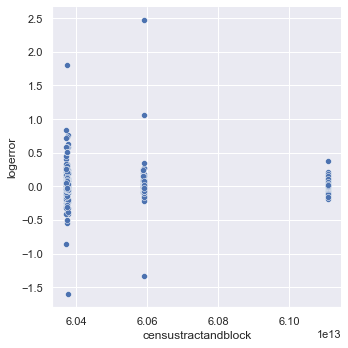

<Figure size 1008x576 with 0 Axes>

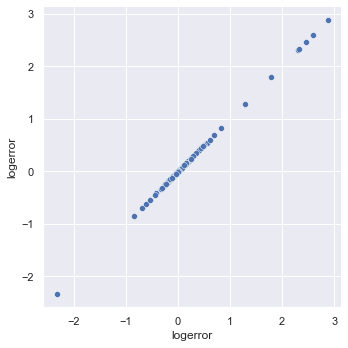

<Figure size 1008x576 with 0 Axes>

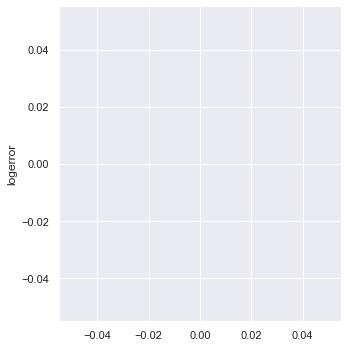

In [18]:
numerical_columns = df.columns[df.dtypes != object]
for col in numerical_columns:
    plt.figure(figsize=(14,8))
    sns.relplot(x=df[col].sample(1000), y=df.logerror)
    plt.show()

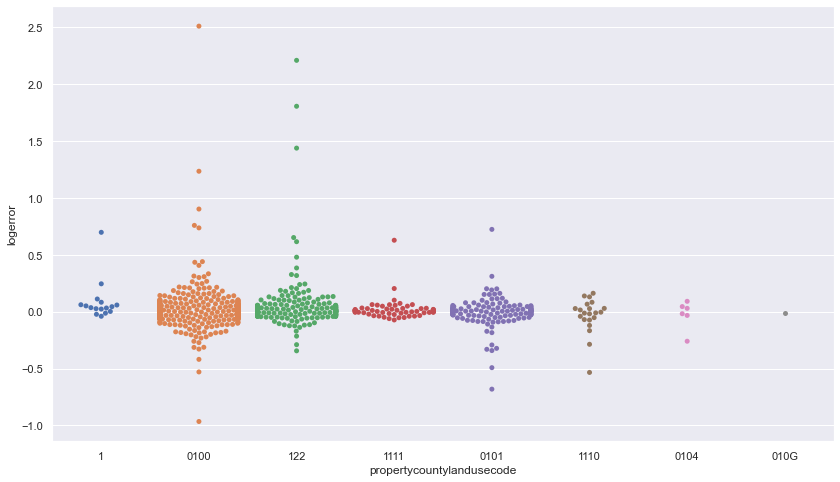

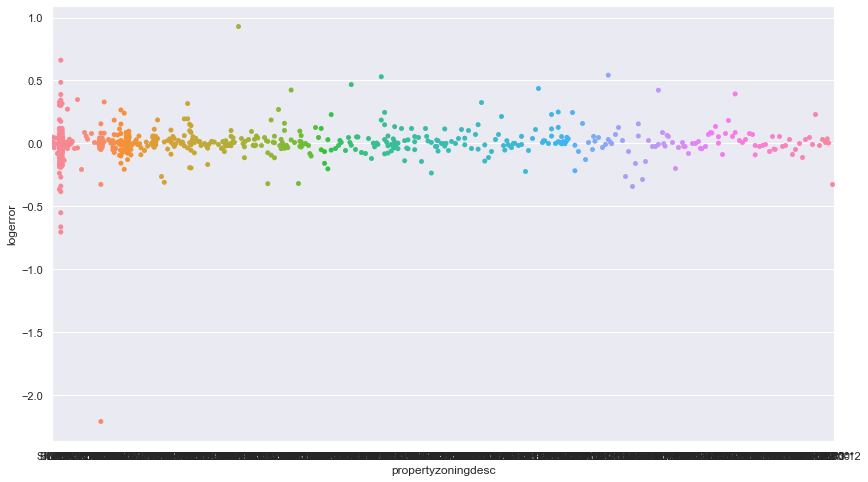

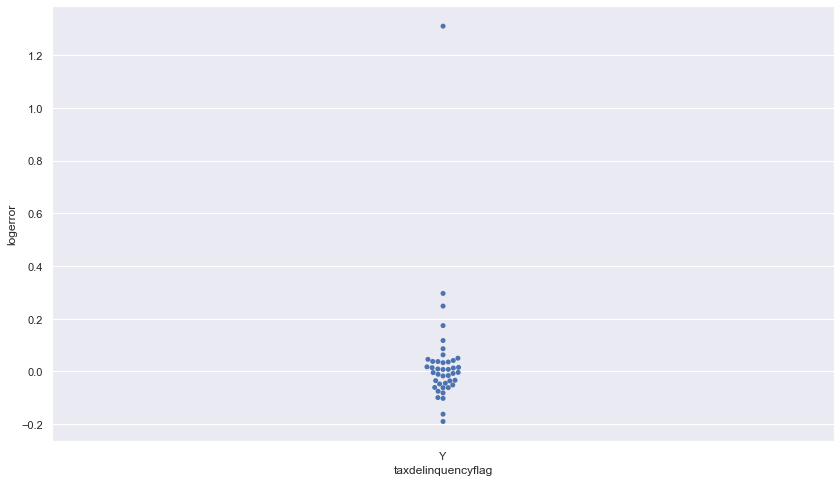

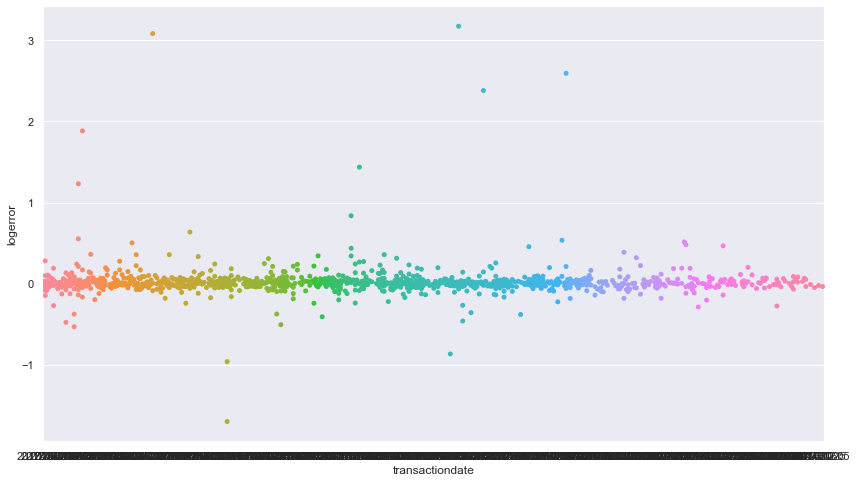

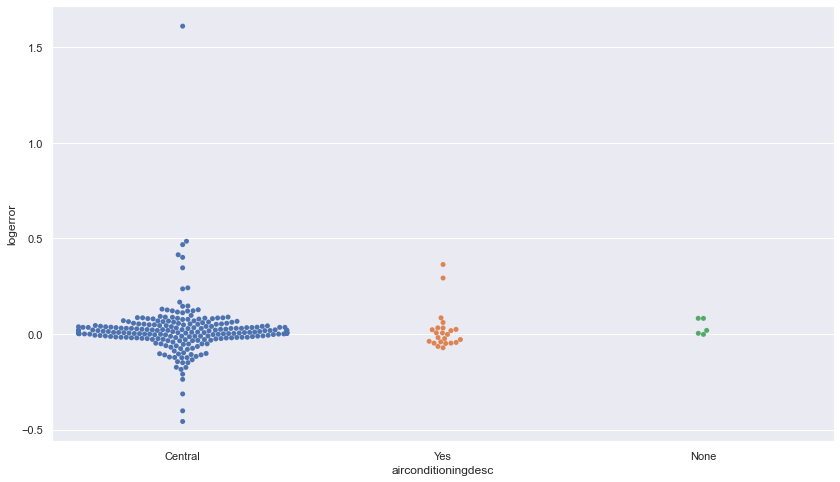

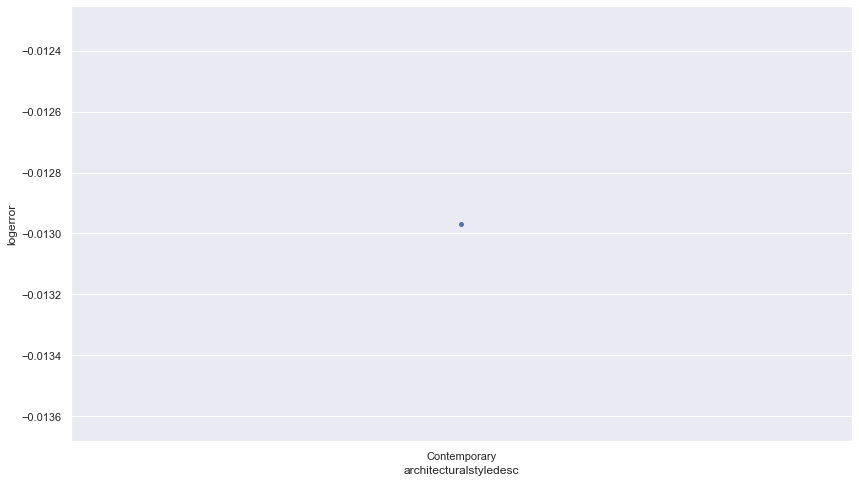

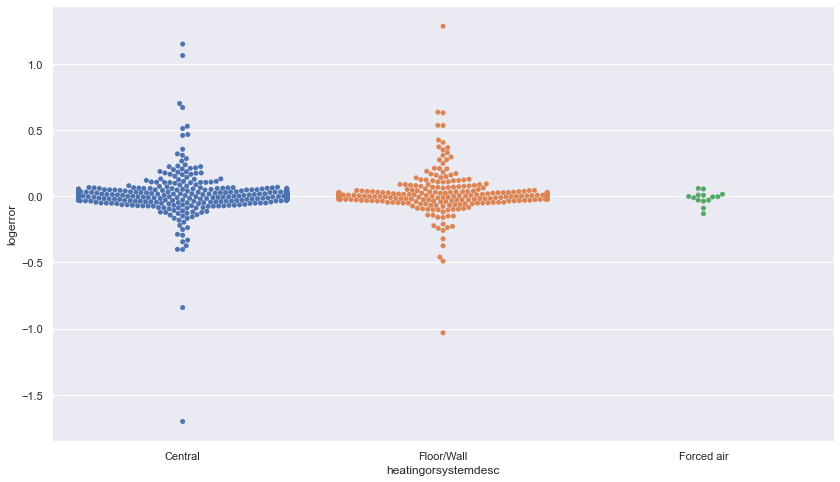

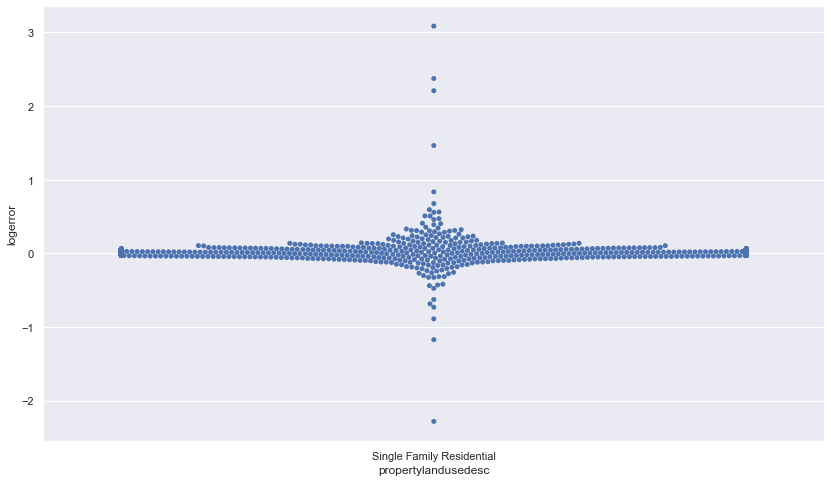

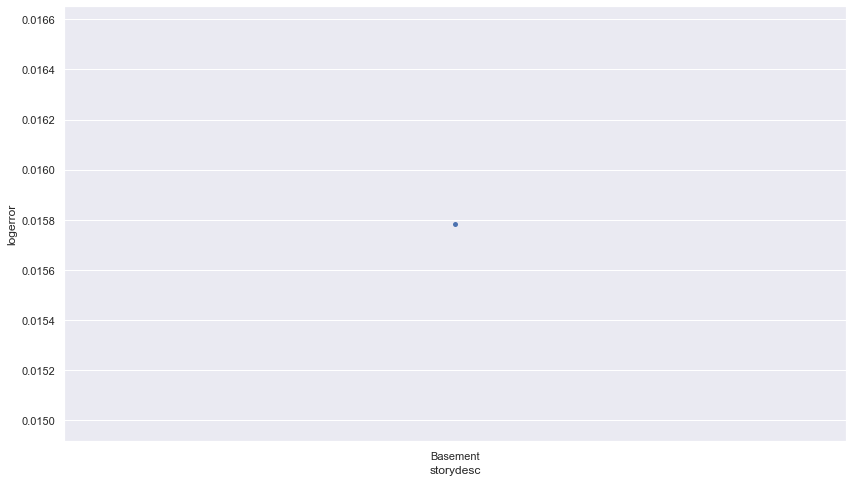

ValueError: min() arg is an empty sequence

<Figure size 1008x576 with 0 Axes>

In [19]:
numerical_columns = df.columns[df.dtypes == object]
for col in numerical_columns:
    plt.figure(figsize=(14,8))
    sns.swarmplot(x=df[col].sample(1000), y=df.logerror)
    plt.show()

## Modeling

## Establish Baseline

In [20]:
#calculate mean
baseline = df.logerror.mean()
baseline

0.018135509392008628

In [21]:
y_train

,logerror
15552,0.01
27258,-0.05
12788,-0.03
24492,0.11
33829,-0.04
...,...
12424,-0.02
25715,0.00
33756,-0.01
29100,0.05


In [22]:
#Create mean baseline model
y_train['baseline_mean_pred'] = y_train['logerror'].mean()
y_validate['baseline_mean_pred'] = y_validate['logerror'].mean()

#Create median baseline model
y_train['baseline_median_pred'] = y_train['logerror'].median()
y_validate['baseline_median_pred'] = y_validate['logerror'].median()

In [23]:
#check mean
y_train.mean()

logerror                               0.01
baseline_mean_pred                     0.01
baseline_median_pred                   0.01
dtype: float64

In [24]:
#check logerror mean
y_train.logerror.mean()

0.007584989169080056

In [25]:
# we can now predict the mean for logerror
logerror_mean = y_train.logerror.mean()
y_train['logerror_pred_mean'] = logerror_mean
y_validate['logerror_pred_mean'] = logerror_mean
y_test['logerror_pred_mean'] = logerror_mean

In [26]:
# we can now predict the median for logerror
logerror_median = y_train.logerror.median()
y_train['logerror_pred_median'] = logerror_median
y_validate['logerror_pred_median'] = logerror_median
y_test['logerror_pred_median'] = logerror_median

In [27]:
# Getting the RMSE loerror_pred_mean

rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# Getting the RMSE logerror_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median)**(1/2)

print("\nRMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  0.07 
Validate/Out-of-Sample:  0.07

RMSE using Median
Train/In-Sample:  0.07 
Validate/Out-of-Sample:  0.07


In [28]:
#get baseline RMSE into df
metric_df = pd.DataFrame(
data=[{
    'model': 'mean_baseline',
    'rmse_train': rmse_train, 
    'r^2_train':explained_variance_score(y_train.logerror,
                                           y_train.logerror_pred_mean)
}])

In [29]:
#check baseline RMSE
metric_df

,model,rmse_train,r^2_train
0,mean_baseline,0.07,-0.00


## Regression Models

## Linear Regression Model

In [30]:
# create model using OLS
lm = LinearRegression()

#fit the model
lm.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train_scaled)

# evaluate rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  0.06712647171114991 
Validation/Out-of-Sample:  0.06595961047518024


In [31]:
#get/append OLS RMSE into df
metric_df = metric_df.append(
{
    'model': 'OLS lm 1',
    'rmse_train': rmse_train, 
    'r^2_train':explained_variance_score(y_train.logerror,
                                           y_train.logerror_pred_lm)
}, ignore_index=True)


In [32]:
#check OLS RMSE
metric_df

,model,rmse_train,r^2_train
0,mean_baseline,0.07,-0.00
1,OLS lm 1,0.07,0.00


## LassoLars Model

In [33]:
# create the model
lars = LassoLars(alpha=1.0)

# fit the model
lars.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

print("RMSE for LassoLars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for LassoLars
Training/In-Sample:  0.06728682906975197 
Validation/Out-of-Sample:  0.06614296208424701


In [34]:
#get/append Lassolars RMSE into df
metric_df = metric_df.append(
{
    'model': 'LassoLars alpha 1',
    'rmse_train': rmse_train, 
    'r^2_train':explained_variance_score(y_train.logerror,
                                           y_train.logerror_pred_lars)
}, ignore_index=True)

In [35]:
#check RMSE
metric_df

,model,rmse_train,r^2_train
0,mean_baseline,0.07,-0.00
1,OLS lm 1,0.07,0.00
2,LassoLars alpha 1,0.07,0.00


### Takeaway

## Polynomial Regression

In [36]:
# making the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)



# create model using OLS
lm = LinearRegression()
#fit the model
lm.fit(X_train_degree2, y_train.logerror)
# predict train
y_train['logerror_pred_pf'] = lm.predict(X_train_degree2)
# evaluate rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_pf)**(1/2)
# predict validate
y_validate['logerror_pred_pf'] = lm.predict(X_validate_degree2)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_pf)**(1/2)

print("RMSE for PF using Polynomial Regression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for PF using Polynomial Regression
Training/In-Sample:  0.06704488417388248 
Validation/Out-of-Sample:  0.06592132375885476


In [37]:
#get/append Polynomial into df
metric_df = metric_df.append(
    {
    'model': 'Polynomial Model',
    'rmse_train': rmse_train,
    'r^2_train': explained_variance_score(y_train.logerror, y_train.logerror_pred_pf)}, ignore_index=True)
metric_df


,model,rmse_train,r^2_train
0,mean_baseline,0.07,-0.00
1,OLS lm 1,0.07,0.00
2,LassoLars alpha 1,0.07,0.00
3,Polynomial Model,0.07,0.01


## Test the Model


In [ ]:
#################################did not run this, has errors#############################

## TweedieRegressor (GLM)

In [ ]:
# create the model 
glm = TweedieRegressor(power=1, alpha=0)

# fit the model
glm.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm)**(1/2)

# predict validate
y_validate['logerror_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_glm)**(1/2)

print("RMSE for GLM  using Tweedie\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
#get/append GLM RMSE into df
metric_df = metric_df.append(
    {
    'model': 'GLM Model power 1',
    'rmse_train': rmse_train,
    'r^2_train': explained_variance_score(y_train.logerror, y_train.logerror_pred_glm)}, ignore_index=True)

In [ ]:
#check GLM df
metric_df